<a href="https://colab.research.google.com/github/molabokchi/bokchi_open_lab/blob/main/artifact_versioning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 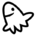 deepdriver artifact versioning tutorial!

welecome to deepdriver! 😀

You can refer to the guide document.
https://bokchi.gitbook.io/deepdriver-ce/

# 0. 💻 install deepdriver

In [ ]:
pip install deepdriver==0.0.48

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#1. ➕ import deepdriver



In [ ]:
import deepdriver

#2. ⚙ deepdriver server setting

Set to the IP of the host where deepdriver CE is installed.

In [ ]:
deepdriver.setting(http_host="xxx.xxxx.xxx.xxx:9011" ,grpc_host="xxx.xxxx.xxx.xxx:19051")

In [143]:
deepdriver.setting(http_host="54.180.86.146:9011" ,grpc_host="54.180.86.146:19051")
deepdriver.login(key="ZjRlYWNmZjc0NGE1MTc5MGI5OGYxYTQ3YmFkM2U0MjcyNzg4ZmFhMzNhNzIxZTk0YzIwZDY2NThjNmNiZWE5Zg==")

True

#3. 🔌 log in to deepdriver

In [ ]:
deepdriver.login(key="{USER_API_KEY}")

True

#4. 🥼 create experiment and run

In [ ]:
epoch =10

In [151]:
def make_exp_name():
  import socket
  from datetime import datetime
  host_name = socket.gethostname()
  date = datetime.today().strftime("%Y%m%d") 

  return "test_arti_" +host_name +"_"+date

In [152]:
# experiment init & config hyperparam
deepdriver.init(exp_name= make_exp_name())

2022-12-12 02:17:38,159 INFO [deepdriver] [experiment.py:21] - DeepDriver initialized
Team Name=molamola.sojeong4
Exp Name=test_arti_0338035b9353_20221212
Run Name=hat-salmonberry-1
Run URL=http://54.180.86.146:9111/experi/molamola.sojeong4/test_arti_0338035b9353_20221212/hat-salmonberry-1/run/chart


INFO:deepdriver:DeepDriver initialized
Team Name=molamola.sojeong4
Exp Name=test_arti_0338035b9353_20221212
Run Name=hat-salmonberry-1
Run URL=http://54.180.86.146:9111/experi/molamola.sojeong4/test_arti_0338035b9353_20221212/hat-salmonberry-1/run/chart


#5. ⬆ upload artifact multiple time

5-1. create artifact & uplodad artifact

In [153]:
arti = deepdriver.Artifacts(name="sample",type="dataset")

In [154]:
arti.add("/content/sample_data")

In [155]:
[ent.path for ent  in arti.entry_list]

['README.md',
 'anscombe.json',
 'mnist_train_small.csv',
 'mnist_test.csv',
 'california_housing_test.csv',
 'california_housing_train.csv']

In [156]:
deepdriver.upload_artifact(arti)

Uploading: [./sample_data/california_housing_train.csv] |██████████████████████████████| [100.0%] [6/6]

True

5-2. add another data to same artifact & upload artifact

In [157]:
arti = deepdriver.Artifacts(name="sample",type="dataset")

In [158]:
arti.add("/content/cat_dog")

In [159]:
deepdriver.upload_artifact(arti)

Uploading: [./cat_dog/cat/cat.png] |██████████████████████████████| [100.0%] [2/2]

True

#7. ⬇ download artifact(data)

In [167]:
arti2 = deepdriver.get_artifact(name="sample",type="dataset",tag ="V1")

2022-12-12 03:55:01,628 INFO [deepdriver] [run.py:38] - artifact is got! 
 artifact id :{284}


INFO:deepdriver:artifact is got! 
 artifact id :{284}


In [168]:
arti2.download()

Downloading: [./deepdriver/artifact/284/mnist_train_small.csv] |██████████████████████████████| [100.0%] [6/6]

'./deepdriver/artifact/284'

In [169]:
! ls ./deepdriver/artifact/284/

anscombe.json		      mnist_test.csv
california_housing_test.csv   mnist_train_small.csv
california_housing_train.csv  README.md


In [166]:
! rm -rf ./deepdriver/artifact/284/

In [163]:
arti2 = deepdriver.get_artifact(name="sample",type="dataset",tag ="V2")

2022-12-12 03:54:25,284 INFO [deepdriver] [run.py:38] - artifact is got! 
 artifact id :{284}


INFO:deepdriver:artifact is got! 
 artifact id :{284}


In [164]:
arti2.download()

Downloading: [./deepdriver/artifact/284/mnist_train_small.csv] |██████████████████████████████| [100.0%] [8/8]

'./deepdriver/artifact/284'

In [165]:
! ls ./deepdriver/artifact/284/

anscombe.json		      cat	      mnist_train_small.csv
california_housing_test.csv   dog	      README.md
california_housing_train.csv  mnist_test.csv


#8. 📊 visualize train result

In [ ]:
df =deepdriver.DataFrame(columns=["step","acc"], data=[ [idx, acc] for idx, acc in enumerate(accuracy)])

In [ ]:
line =deepdriver.line(df,"step","acc")

In [ ]:
deepdriver.visualize(line)

In [ ]:
df =deepdriver.DataFrame(columns=["step","loss"], data=[ [idx, loss] for idx, loss in enumerate(train_loss)])

In [ ]:
line =deepdriver.line(df,"step","loss")

In [ ]:
deepdriver.visualize(line)

In [ ]:
df =deepdriver.DataFrame(columns=["step","acc"], data=[ [idx, acc] for idx, acc in enumerate(accuracy)])

In [ ]:
historgram = deepdriver.histogram(df,"step","acc")

In [ ]:
deepdriver.visualize(historgram)

In [ ]:
scatter = deepdriver.scatter(df,"step","acc")

In [ ]:
deepdriver.visualize(scatter)

# 9. 📈 send log for chart & table

In [ ]:
df =deepdriver.DataFrame(columns=["step","loss"], data=[ [idx, loss] for idx, loss in enumerate(train_loss)])
line =deepdriver.line(df,"step","loss")
deepdriver.log({"my_line_chart":line})

Uploading: [./deepdriver/run/3/chart/my_line_chart.CHART.json] |██████████████████████████████| [100.0%] [1/1]

True

In [ ]:
df =deepdriver.DataFrame(columns=["step","acc"], data=[ [idx, acc] for idx, acc in enumerate(accuracy)])
historgram = deepdriver.histogram(df,"step","acc")
deepdriver.log({"my_histogram_chart":historgram})

Uploading: [./deepdriver/run/3/chart/my_histogram_chart.CHART.json] |██████████████████████████████| [100.0%] [1/1]

True

In [ ]:
df =deepdriver.DataFrame(columns=["step","acc"], data=[ [idx, acc] for idx, acc in enumerate(accuracy)])
scatter = deepdriver.scatter(df,"step","acc")
deepdriver.log({"my_scatter_chart":scatter})

Uploading: [./deepdriver/run/3/chart/my_scatter_chart.CHART.json] |██████████████████████████████| [100.0%] [1/1]

True

#10. 🔚 finish run

In [ ]:
# finish experiment
deepdriver.finish()

True